# Project Holly
Survey analysis.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(data, x, save, order=[], ax=None):
    if not ax:
        fig, ax = plt.subplots();
        
    if not order:
        chart = sns.countplot(ax=ax, data=data, x=x);
    else:
        chart = sns.countplot(ax=ax, data=data, x=x, order=order);
        
    rotate_xlabels(chart);
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), x);
        plt.show()
    return chart;
    
def create_histogram(data, name, save, ax=None):
    if not ax:
        fig, ax = plt.subplots();

    chart = sns.histplot(ax=ax, data=data)
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), name)
        plt.show()
    return chart;

In [3]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [4]:
survey_data = pd.read_csv("clean_survey_data.csv");
display(survey_data.shape) # rows & columns

(122, 45)

In [5]:
display(survey_data.isnull().sum()) # display null values

Progress                                   0
Duration (in seconds)                      0
Finished                                   0
Age_Range                                  0
Gender                                     0
Degree                                     0
Income                                     0
Employment                                 0
Job_Type                                   0
Industry_Manufacturing                     0
Industry_Automobile                        0
Industry_Construction                      0
Technology_VR                              0
Technology_AR                              0
Technology_MR                              0
Used                                      21
Use_Cases                                 54
Use_Cases_Other                          122
Effective_Channel_LinkedIn                 0
Effective_Channel_FB_IG                    0
Effective_Channel_Google                   0
Effective_Channel_YouTube                  0
Effective_

In [ ]:
# replace nulls with 0 in numeric fields
#replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
#survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics
What is your age range? <br>
What is your gender? <br>
What is the highest degree you have completed? <br>
What is your household income? <br>
What is your employment status? <br>
What would you consider yourself? 

In [32]:
display(survey_data["Degree"].unique())

array(['Graduate degree or higher', 'Bachelor’s degree or equivalent',
       'High school graduate or equivalent (GED)',
       'Associate degree or equivalent'], dtype=object)

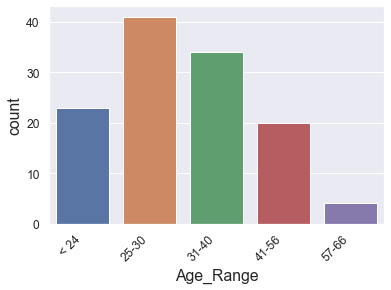

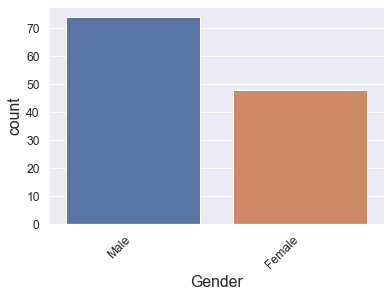

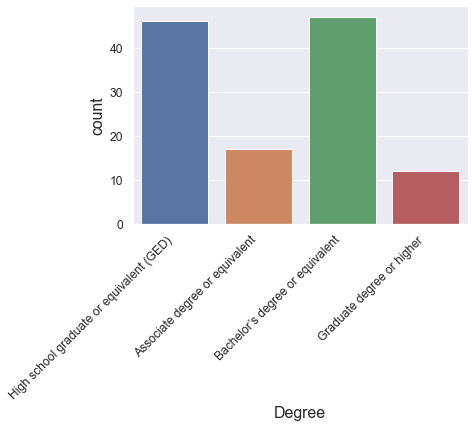

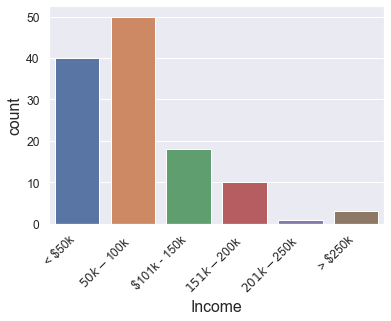

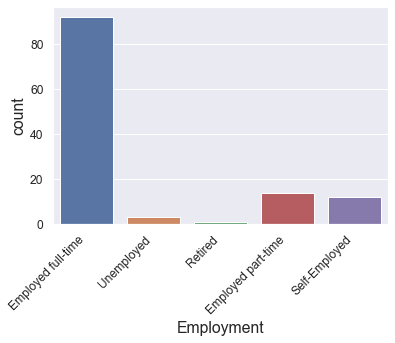

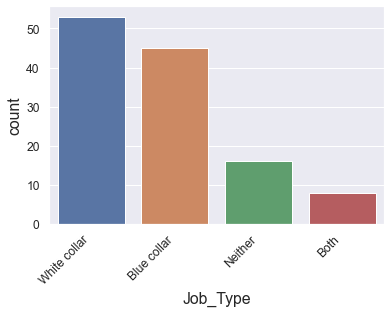

In [24]:
# Age_Range                                  0
# Gender                                     0
# Degree                                     0
# Income                                     0
# Employment                                 0
# Job_Type                                   0
order_age = ["< 24", "25-30", "31-40", "41-56", "57-66"]
create_countplot(survey_data, "Age_Range", True, order_age);
create_countplot(survey_data, "Gender", True);

order_degree = [
    'High school graduate or equivalent (GED)',
    'Associate degree or equivalent',
    'Bachelor’s degree or equivalent',
    'Graduate degree or higher'
        ]
create_countplot(survey_data, "Degree", True, order_degree);

order_income = [
    '< $50k', 
    '$50k - $100k', 
    '$101k - 150k',   
    '$151k - $200k', 
    '$201k - $250k',
    '> $250k'
]
create_countplot(survey_data, "Income", True, order_income);
create_countplot(survey_data, "Employment", True);
create_countplot(survey_data, "Job_Type", True);

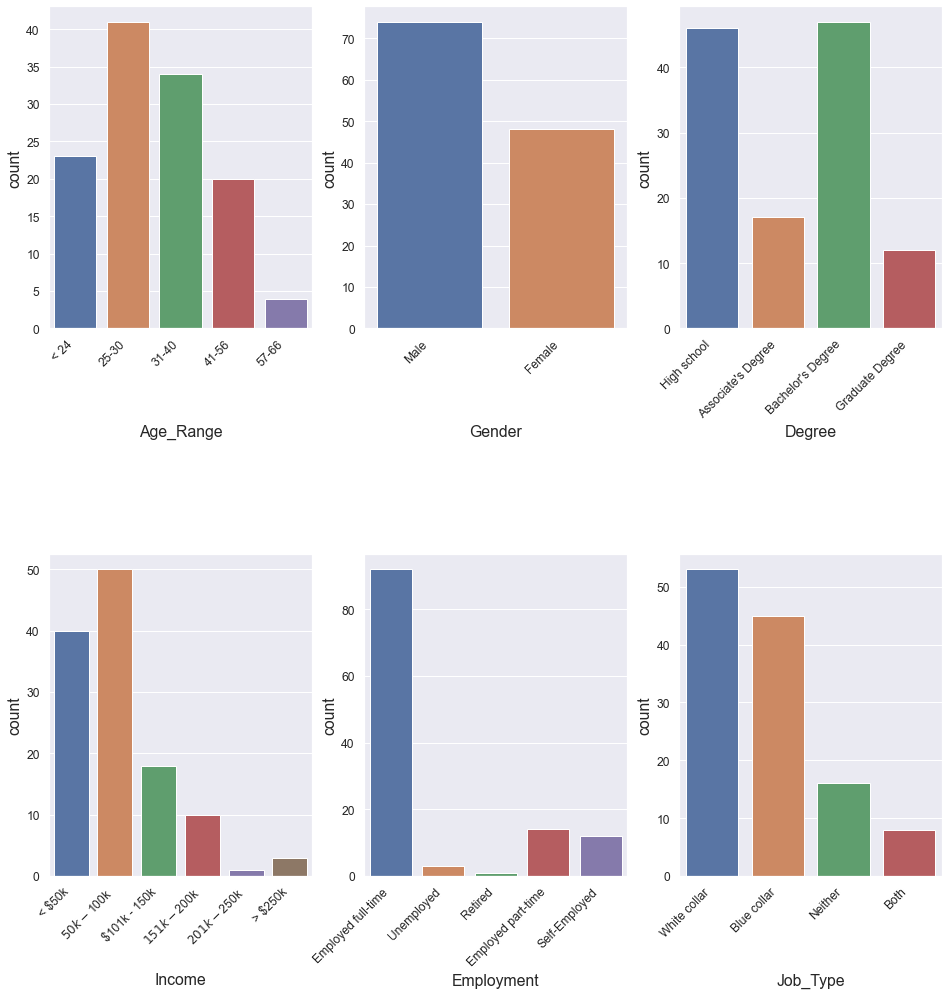

In [35]:
fig, axes = plt.subplots(2,3, figsize=(16,16));
create_countplot(survey_data, "Age_Range", False, order_age, ax=axes[0][0]);
create_countplot(survey_data, "Gender", False, ax=axes[0][1]);
chart = create_countplot(survey_data, "Degree", False, order_degree, ax=axes[0][2]);
axes[0][2].set_xticklabels(["High school", "Associate's Degree", "Bachelor's Degree", "Graduate Degree"], rotation=45)
create_countplot(survey_data, "Income", False, order_income, ax=axes[1][0]);
create_countplot(survey_data, "Employment", False, ax=axes[1][1]);
create_countplot(survey_data, "Job_Type", False, ax=axes[1][2]);
fig.align_xlabels(axes)
fig.subplots_adjust(hspace=0.)
save_figure(fig, 'Demographics');

## Participant Industries
Are you in the manufacturing industry? <br>
Are you in the automobile industry? <br>
Are you in the construction industry?

In [8]:
# Industry_Manufacturing                     0
# Industry_Automobile                        0
# Industry_Construction                      0

## Technologies Used
Rate how familiar you are with the following technology?

In [9]:
# Technology_VR                              0
# Technology_AR                              0
# Technology_MR                              0

## Used Channels
Have you used any of the following (Check all that applies):

In [10]:
# Used                                      21

## Use Cases
Thinking about your workplace, can you see any of the following technologies having potential use cases? (Check all the applies)

In [11]:
# Use_Cases                                 54
# Use_Cases_Other                          122

## Effective Channels
If you are looking for certain products that could assist you in projects for your business/workplace, which of the following channels do you think would be most effective in finding you what you want: 

In [12]:
# Effective_Channel_LinkedIn                 0
# Effective_Channel_FB_IG                    0
# Effective_Channel_Google                   0
# Effective_Channel_YouTube                  0
# Effective_Channel_Trade_Show               0
# Effective_Channel_Webinar                  0
# Effective_Channel_Phone_Email              0
# Effective_Channel_Billboard                0
# Effective_Channel_Magazine                 0
# Effective_Channel_Television               0
# Effective_Channel_Radio                    0
# Effective_Channel_Website                  0

## Frequent Channels
If you are looking for certain products that could assist you in projects for your business/workplace, what platforms do you use most frequently when searching for products/solutions?

In [13]:
# Frequent_Channel_LinkedIn                  0
# Frequent_Channel__FB_IG                    0
# Frequent_Channel_Twitter                   0
# Frequent_Channel_Google                    0
# Frequent_Channel_YouTube                   0
# Frequent_Channel_Blogs                     0
# Frequent_Channel_Press                     0

## Previous Channels
Have you used any of the following platforms previously to search for products/solutions for your business/workplace? (Check all that applies)

In [14]:
# Previous_Channel                           5
# Previous_Channel_Other                   120

## Acquisition Channels
When it comes to high tech or software products, which of the follow channels do you prefer to acquire the products from?

In [15]:
# Acquisition_Channel_Website                0
# Acquisition_Channel_Online                 0
# Acquisition_Channel_Cloud_Marketplace      0
# Acquisition_Channel_Distributor            0
# Acquisition_Channel_SI_Consultant          0
# Acquisition_Channel_Retail                 0